## Import

In [1]:
!pip install zeep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 9.9 MB/s 
     |████████████████████████████████| 54 kB 3.4 MB/s 
     |████████████████████████████████| 41 kB 755 kB/s 


In [2]:
!pip install xmltodict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from http import client # https://docs.python.org/3/library/http.client.html
import requests # https://pypi.org/project/requests/
import zeep # https://docs.python-zeep.org/en/master/
from urllib.request import urlopen # https://docs.python.org/3/library/urllib.html
from zeep import Client, Transport
import json
import xmltodict
from lxml import etree, html
import ssl
from requests.structures import CaseInsensitiveDict
import warnings
warnings.filterwarnings("ignore") # since i will set ssl verification as false, it will continously give a warning. the code will still work, but there will be a warning message in the output everytime we send a request

# different ways to send request and how to set ssl verification as false

what happens when we don't set verification as false:
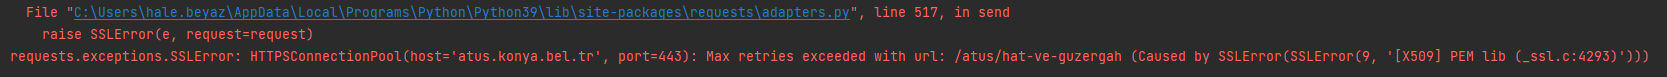

In [4]:
# requesting with urllib                             --> urllib.request.urlopen(HOSTNAME, context = ssl._create_unverified_context())
# requesting with http client                        --> http.client.HTTPSConnection(HOSTNAME, context = ssl._create_unverified_context())
# requesting with lxml.requests                      --> requests.get(HOSTNAME, verify=False) 
# requesting with urllib urllib.request.urlopen      --> ctx = ssl.create_default_context()
                                                       # ctx.check_hostname = False
                                                       # ctx.verify_mode = ssl.CERT_NONE

                                                       # with urllib.request.urlopen(url_string, context=ctx) as u, open(file_name, 'wb') as f:
                                                                # f.write(u.read())

# copy XPath

###***copying xpath of a html element:***


1.   go to page
2.   right click - inspect (F12)
3.   ELEMENTS page on the newly opened DevTools window
4.   use arrow on left top to select the desired element from the page OR search for it with ctrl+f (i.e searching "Contact Us" will take us to the every element that has "Contact Us" in it, as a class, id or text.)
5.  right click on the html element on DevTools - copy - copy XPath or copy full XPath

# copy CURL and request with CURL, turning it to a requesting code

###***copy CURL:***
1. go to page
2. right click - inspect (F12)
3. refresh page
4. switch to NETWORK page on the newly opened DevTools window
5. select any of the pages listed (.html, .php, .js, .com... etc.) and right click - copy - copy as CURL (cmd)
6. erase all ^ and copy the new CURL
7. paste the CURL to the DevTools console on the bottom, select all, copy again (if i don't do this my windows shell takes every line as a new command and doesn't execute it)
8. open cmd and go to the path with LIBCURL.EXE (cd Downloads\curl-7.64.1\I386) --> https://skanthak.homepage.t-online.de/curl.html#download
9. paste CURL and see if it returns the desired page/data
10. if works, go to https://reqbin.com/curl and paste the curl, then select generate code-python

# method for http.client


In [5]:
def req_url(con, method, body): # con -> host name
    connection = client.HTTPSConnection(con, context=ssl._create_unverified_context()) # to not get an ssl error, set verification as false with sending this parameter to http client => ssl._create_unverified_context() 
    connection.request(method, body) # method -> method we use to requesting the page (GET, POST, PUT... vs)
    return connection.getresponse()

# requesting with http client

In [6]:
# download bursa burulas bus routes with http.client -> http://petekapi.burulas.com.tr/burulasweb/otobus/hatlar -> json
def bursa():
  response_bursa = req_url('petekapi.burulas.com.tr', 'GET', '/burulasweb/otobus/hatlar')
  json_response_bursa = response_bursa.read().decode('utf8')
  data_bursa = json.loads(json_response_bursa) # returns a json data as response
  for d in data_bursa:
    print(d["HatAdi"])
  # print(data_bursa)

# request with lxml.requests (get)

In [7]:
# download sakarya sakus bus routes with lxml.requests -> https://sakus.sakarya.bel.tr/ -> html 
def sakarya():
  response_sakarya = requests.get('https://sakus.sakarya.bel.tr/', verify=False) # verify=false is sent as a parameter for lxml.requests to not get an ssl verification error
  data_sakarya = response_sakarya.text
  doc_sakarya = html.fromstring(data_sakarya) # returns a html page as response, so we convert the string to a html document
  # print(data_sakarya)
  hatlar = doc_sakarya.xpath('//*[@id="drpHat"]//option')
  # print (hatlar)
  for hat in hatlar:
      # print(hat)
      # print(hat.xpath('.//text()'))
      hatid = hat.get('value') # getting the 'value' attribute from a html element -> <option value="-100">Hat Seçiniz!</option> -> 'hat' option element. if we wanted the 'href' attribute from <a href="https://www.google.com"> GOOGLE </a> we would use hat.get('href')
      hatname = hat.xpath('.//text()')[0] # get text from the html element. the result is a list, so we have to check which elements are the ones we need.
      print(hatid + '|' + hatname)

In [8]:
  # different ways we can use to get html element attributes. this block is not necessary to run for next blocks
  
  response_sakarya = requests.get('https://sakus.sakarya.bel.tr/', verify=False) 
  data_sakarya = response_sakarya.text
  doc_sakarya = html.fromstring(data_sakarya)
  html_element = doc_sakarya.xpath('/html/body')[0]
  print(html_element)
  print(html_element.get('onload'))

<Element body at 0x7fec2afd9bf0>
init()


# requesting with requests.post while using the headers we created with CURL

In [9]:
# downloading buscard filling and sales locations of malatya motaş with requests.post -> https://www.motas.com.tr/ajax/card-store-point.php -> html
def malatya():
  response_malatya = req_url('motas.com.tr', 'GET', '/card/motas-kart-satis-dolum-noktalari.html') 
  page_response = response_malatya.read().decode('utf8')
  doc_malatya = html.fromstring(page_response)
  bayiler_malatya = doc_malatya.xpath('//*[@id="storeSelect"]/option')


  for bayi in bayiler_malatya: 
    if bayi.get('value') is not None:
        bayi_val = bayi.get('value')
        bayi_adi = bayi.xpath('.//text()')[0]
        print(bayi_val, bayi_adi)
        url = "https://www.motas.com.tr/ajax/card-store-point.php" # 2nd url to send a request to

        # headers we need to send a request to the page -> use https://reqbin.com/curl to convert the curl to python code
        headers = CaseInsensitiveDict()
        headers["accept"] = "*/*"
        headers["content-type"] = "application/x-www-form-urlencoded; charset=UTF-8"
        headers["origin"] = "https://www.motas.com.tr"
        headers["referer"] = "https://www.motas.com.tr/card/motas-kart-satis-dolum-noktalari.html"
        headers["user-agent"] = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36"
        headers["x-requested-with"] = "XMLHttpRequest"

        # the bayi_val we found (sales location id) in the first page is used to send a request to the second page and it returns the information about that specific location
        data = "valueSelected=" + bayi_val + "&is_ajax=1"

        response_malatya2 = requests.post(url, headers=headers, data=data, verify=False) # verify=False again in the post request
        
        doc_malatya2 = html.fromstring(response_malatya2.text)
        working_hours = doc_malatya2.xpath('.//*[@class="card-body"]//*[@class="row"][3]//text()')
        working_hours_str = ""
        for w in working_hours:
          working_hours_str += w.replace("\n", " ").replace("\t", "") + " "
        print(working_hours_str)

# send request to wsdl url with zeep

In [10]:
# download announcements from the iett api 
# api document -> https://data.ibb.gov.tr/dataset/53b985b6-24af-4fda-aa59-1b45dde2e665/resource/6efd7520-0fbf-421b-975a-a73cb9137ef2/download/iett-web-servis-kullanm-dokumanv.1.1.pdf
def istanbul():
    session = requests.Session()
    session.verify = False # ssl verification false
    transport = Transport(session=session)

    client = Client(wsdl="https://api.ibb.gov.tr/iett/UlasimDinamikVeri/Duyurular.asmx?wsdl", transport=transport)

    data_text = client.service.GetDuyurular_XML() # sned request to one of the methods
    your_pretty_xml = etree.tostring(data_text, encoding="unicode", pretty_print=True) # xonvert to xml string from the tree
    print(your_pretty_xml) # print xml
    for d in list(data_text):
        hatkodu = d.find('HAT').text
        mesaj = d.find('MESAJ').text
        print(hatkodu + "\n --->" + mesaj + "\n") # print route code and message/announcement







    # in this loop we can see the methods and parameters required from the web service in the link that are usable
    interface = {}
    # e = client.service
    for service in client.wsdl.services.values():
        interface[service.name] = {}
        for port in service.ports.values():
            interface[service.name][port.name] = {}
            operations = {}
            for operation in port.binding._operations.values():
                operations[operation.name] = {}
                operations[operation.name]['input'] = {}
                elements = operation.input.body.type.elements
                operations[operation.name]['input'] = parseElements(elements)
            interface[service.name][port.name]['operations'] = operations
    print(interface) # print method-parameter list



def parseElements(elements):
    all_elements = {}
    for name, element in elements:
        all_elements[name] = {}
        all_elements[name]['optional'] = element.is_optional
        if hasattr(element.type, 'elements'):
            all_elements[name]['type'] = parseElements(
                element.type.elements)
        else:
            all_elements[name]['type'] = str(element.type)

    return all_elements


# read an xml file from a url with urlopen

In [11]:

def denizli():
    file = urlopen('https://ulasim.denizli.bel.tr/veri.ashx?t=belediye', context=ssl.SSLContext())
    data = file.read()
    file.close()
    data = xmltodict.parse(data)

    for belediye in data["Belediyeler"]["Belediye"]:
        print(belediye["ID"] + "|" + belediye["ADI"])

# call for the methods

In [12]:
bursa()

1/A
1/C
1/GY
1/K
1/M
1/M      BUDO
1/SY
1/T
2/B
2/BT
2/E
2/G
2/GM
2/K
2/U
2/KÇ
2/M
2/MU
3/C
3/G
3/İ
4/A
4/B
4/G
4/İ
5/A
5/G
6/A
6/E
6/F
6/F-D
6/F-1
6/F-2
6/K-1
7/A
7/C
7/S
8/L
9/D
9/M
9/P-A
14/F
14/L
14/L-2
14/N
15
15/A
15/B
15/D
15/H
16/A
16/İ
17
17/A
17/B
17/C
17/D
17/E
17/S
17/Y
18
18/B
18/İ
18/Y
19
19/A
19/B
19/C
19/D
19/E
19/İ
20
20/A
21
21/C
22/C
21/CK
23
23/A
24/B
24/D
25
25/A
25/B
25/D
27/A
28
28/A
29/A
30
31/A
35/B
35/C
35/E-1
35/E-2
35/G
35/H
35/S
35/S EKSPRESS
35/U
36
36/A
37
38
38/B
38/B-2
38/D
38/D-2
38/G
40/H
43/A
43/D
43/H
43/HB
60/B
60/K
80
91
91/G
92
92/B
93
94
95
95/A
95/B
96
97
97/A
97/B
97/F
97/G
98
98/E
99
101
102
103
103/A
104
111/A
112/A
111/B
112
113
114
113/A
114/A
115
116
118/A
117
119/A
119
130
131
132
133
134
135
136
137
139
140
401
501
601
601/U
801
811
811/D
812/T
812/S
813/C
813/H
814
815
816
817
818
818/H
820
901
903
630
912
913
631
914
914/A
991
992
B/1
B/2
B/2-A
B/3
B/4
B/3-K
B/5
B/6
B/7
B/8
B/9
B/10
B/10-K
B/12
B/13
B/15
B/15-C
B/16-A
B/16-B
B/17
B/17

In [13]:
sakarya()

-100|Hat Seçiniz!
1|1 - SAKARYA PARK - KÜPÇÜLER - KUZEY TERMİNAL
2|2 - GAR MEYDANI - HIZIR İLYAS
3|3 - DEMOKRASİ MEYDANI - YEŞİLTEPE - YENİ TERMİNAL
4|4 - KAMPÜS – ET BALIK
5|5 - GAR MEY.- DÖRTYOL - BEŞKÖPRÜ - KAMPÜS
6|6 - GAR MEY.- 32 EVLER - BEŞKÖPRÜ - KAMPÜS
7|7 - DEMOKRASİ  MEYDANI - YILDIZTEPE - YENİ TERMİNAL
9|9A - MALTEPE - OZANLAR - YAZLIK
10|9B - MALTEPE - ŞEKER - YAZLIK
12|12 - YAZLIK - KAMPÜS - ESENTEPE
14|14 - GAR MEY. - LOJMANLAR - YAZLIK
15|15 - KAMPÜS - YENİ SAKARYA ATATÜRK STADYUMU
17|17 - GÜNEŞLER - ADATIP HAST. - ŞİMŞEK EVLER
18|18 - ZİRAİ ALET. SAN. - ADATIP HAST. - YILDIZ
9013|19S - OFİS GARAJ - ÇARK - SERDİVAN SİVRİTEPE TURNİKE
29|19K - SAKARYA PARK - HACIOĞLU - KAMPÜS
20|20 - OFİS GARAJ - ALTINOVA - 32 EVLER - KAMPÜS
13|20A - OFİS GARAJ - SERDİVAN - BEŞKÖPRÜ
22|21K - KARAMAN - KAMPÜS EKSPRES
8963|21D - UNKAPANI (671 SK) - İKİZCE GİRİŞİ - KARAMAN
8962|21C - UNKAPANI - S.ZAİM BULVARI - KARAMAN
35|22K - CAMİLİ 1/2 - KAMPÜS EKSPRES
8965|22D - OFİS GARAJ - S.KİRTETEPE 

In [14]:
malatya()

56 ALİOĞLU GIDA
   Hafta İçi   07:00 - 20:00   Hafta Sonu   07:00 - 20:00   
8 ARAŞTIRMA HASTANE GİŞESİ
   Hafta İçi   08:00 - 17:00   Cumartesi   08:00 - 17:00   
68 BAHÇECİ KURUYEMİŞ
   Hafta İçi   08:00 - 23:00   Hafta Sonu   08:00 - 23:00   
19 BESYO KİOSK
   Hafta İçi   00:00 - 23:59   Hafta Sonu   00:00 - 23:59   
72 BEYDAĞI GIDA
   Hafta İçi   10:30 - 02:00   Hafta Sonu   10:30 - 02:00   
21 BİLET ODASI
   Hafta İçi   08:00 - 17:00   
40 BİRTAT KURUYEMİŞ
   Hafta İçi   06:30 - 21:00   Hafta Sonu   06:30 - 21:00   
9 BOSTANBAŞI KİOSK
   Hafta İçi   00:00 - 23:59   Hafta Sonu   00:00 - 23:59   
65 BOYBEY UNLU MAMULLERİ
   Hafta İçi   07:00 - 23:00   Hafta Sonu   07:00 - 23:00   
64 BULUŞ MARKET
   Hafta İçi   06:30 - 22:00   Hafta Sonu   06:30 - 22:00   
57 BUSE KOZMETİK
   Hafta İçi   07:30 - 21:00   Hafta Sonu   07:30 - 21:00   
12 BÜYÜKŞEHİR BELEDİYE ÖNÜ KİOSK
   Hafta İçi   00:00 - 23:59   Hafta Sonu   00:00 - 23:59   
66 CANPOLAT MARKET
   Hafta İçi   06:30 - 22:00   Hafta So

In [15]:
istanbul()

<NewDataSet xmlns="" xmlns:soap="http://schemas.xmlsoap.org/soap/envelope/" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:xsd="http://www.w3.org/2001/XMLSchema">
  <Table>
    <HAT>132K</HAT>
    <TIP>Sefer</TIP>
    <GUNCELLEME_SAATI>Kayit Saati: 14:26</GUNCELLEME_SAATI>
    <MESAJ>SULTANBEYLI PERONLAR dan Saat 15:15 de hareket etmesi planlanan seferimiz  çesitli nedenlerle yapilamayacaktir.</MESAJ>
  </Table>
  <Table>
    <HAT>141M</HAT>
    <TIP>Sefer</TIP>
    <GUNCELLEME_SAATI>Kayit Saati: 07:13</GUNCELLEME_SAATI>
    <MESAJ>MECIDIYEKÖY METROBÜS dan Saat 15:25 de hareket etmesi planlanan seferimiz  çesitli nedenlerle yapilamayacaktir.</MESAJ>
  </Table>
  <Table>
    <HAT>142</HAT>
    <TIP>Sefer</TIP>
    <GUNCELLEME_SAATI>Kayit Saati: 14:12</GUNCELLEME_SAATI>
    <MESAJ>BOGAZKÖY SON DURAK dan Saat 15:10 de hareket etmesi planlanan seferimiz  çesitli nedenlerle yapilamayacaktir.</MESAJ>
  </Table>
  <Table>
    <HAT>142</HAT>
    <TIP>Sefer</TIP>
    <GUNCELLEME_SA

In [16]:
denizli()

a37d56de-730d-4270-ba8a-ab59bb2a5392|ACIPAYAM
bb922d62-1ba8-41af-ac73-cc7c876f7141|BABADAĞ
5aa277d4-6a6a-49e9-97f9-6c5dd4f8a6a8|BAKLAN
717f6c3d-3d40-45b5-a252-06e3ec6ae5a3|BEKİLLİ
515261bf-64f0-49ed-b669-c2027e9d37e1|BEYAĞAÇ
43c6097e-ba6f-4046-be38-105227a49937|BOZKURT
fecfa6fa-f453-4b0b-b801-acfbd8dfea5b|BULDAN
18a17789-49a9-4458-8b24-108d28d287d3|ÇAL
29bc33ab-4392-4062-a6ec-4b5a6a779fc7|ÇAMELİ
46a37c72-0e67-4105-b0b7-75dadd6ee584|ÇARDAK
aa14b56f-9d14-422b-925b-65c4e93fe032|ÇİVRİL
dbfba8a1-1ae1-476e-a727-00cc55948b1d|GÜNEY
43e24f43-4829-4b76-8769-9c28fb86df0c|HONAZ
c539682f-24c3-4c90-8e50-f6bbd2578bea|KALE
71873e42-696c-46f8-a273-c24610a52174|MERKEZEFENDİ
768d5863-b379-43a4-bfb5-211de15cf63f|PAMUKKALE
ab7dc6fc-b5ac-49c2-8c9b-97367ec2a044|SARAYKÖY
0444436a-93f0-44f8-bb74-ece23d68f04b|SERİNHİSAR
da3cc3b8-ad00-4fc8-a03e-2bfda1b5533b|TAVAS
